## Importing Libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime


## Data Preprocessing and Cleaning

In [43]:
data = pd.read_csv('../input/beijingapi/beijing-air-quality.csv')
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.tz_localize(None)
data.head()
data.shape

(3261, 7)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3261 non-null   datetime64[ns]
 1    pm25   3261 non-null   object        
 2    pm10   3261 non-null   object        
 3    o3     3261 non-null   object        
 4    no2    3261 non-null   object        
 5    so2    3261 non-null   object        
 6    co     3261 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 178.5+ KB


In [45]:
data.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,pm25,pm10,o3,no2,so2,co
count,3261,3261,3261,3261,3261,3261,3261
unique,3261,314,231,152,71,56,61
top,2022-12-01 00:00:00,112,54,24,14,1,5
freq,1,32,57,96,147,921,353
first,2013-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.isnull().sum()

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64

From the visualization, we came to know we don’t have any null values in the data frame.

We have all numerical features no categorical features so there is no need of encoding

In [47]:
 mapping = {data.columns[0]:'date', data.columns[1]: 'aqi', data.columns[2]:'pm', data.columns[3]: 'ozone',data.columns[4]:'nitrous', data.columns[5]:'sulphur',data.columns[6]:'monoxide'}
 data = data.rename(columns=mapping)
 data

,date,aqi,pm,ozone,nitrous,sulphur,monoxide
0,2022-12-01,41,61,5,24,3,5
1,2022-12-02,119,29,25,11,,2
2,2022-12-03,49,29,17,12,,1
3,2022-12-04,48,43,21,19,1,3
4,2022-12-05,76,55,19,26,1,7
...,...,...,...,...,...,...,...
3256,2018-12-31,,46,17,20,5,9
3257,2017-09-10,,23,35,19,1,3
3258,2014-12-31,,67,19,29,16,11
3259,2013-12-31,,85,20,30,14,20


### Converting the data to float format and removing NaN values

In [48]:
data= data.replace('^\s*$',np.nan, regex = True)
data['aqi'] = pd.to_numeric(data['aqi'])
data['pm'] = pd.to_numeric(data['pm'])
data['ozone'] = pd.to_numeric(data['ozone'])
data['nitrous'] = pd.to_numeric(data['nitrous'])
data['sulphur'] = pd.to_numeric(data['sulphur'])
data['monoxide'] = pd.to_numeric(data['monoxide'])
data.isnull().sum()
data.dropna(inplace=True)
data

,date,aqi,pm,ozone,nitrous,sulphur,monoxide
0,2022-12-01,41.0,61.0,5.0,24.0,3.0,5.0
3,2022-12-04,48.0,43.0,21.0,19.0,1.0,3.0
4,2022-12-05,76.0,55.0,19.0,26.0,1.0,7.0
5,2022-12-06,106.0,44.0,14.0,25.0,1.0,4.0
6,2022-12-07,82.0,36.0,23.0,20.0,1.0,3.0
...,...,...,...,...,...,...,...
3250,2014-03-27,321.0,108.0,39.0,33.0,14.0,21.0
3251,2014-03-28,207.0,68.0,43.0,15.0,3.0,16.0
3252,2014-03-29,103.0,59.0,43.0,21.0,3.0,10.0
3253,2014-03-30,93.0,117.0,39.0,34.0,18.0,22.0


## EDA

In [ ]:
# We also check the corelation between dependent and independent feature
data.corr()
relation =data.corr()
relation_index=relation.index
plt.figure(figsize=(8,8))
sns.heatmap(data[relation_index].corr(),annot=True)
plt.show()

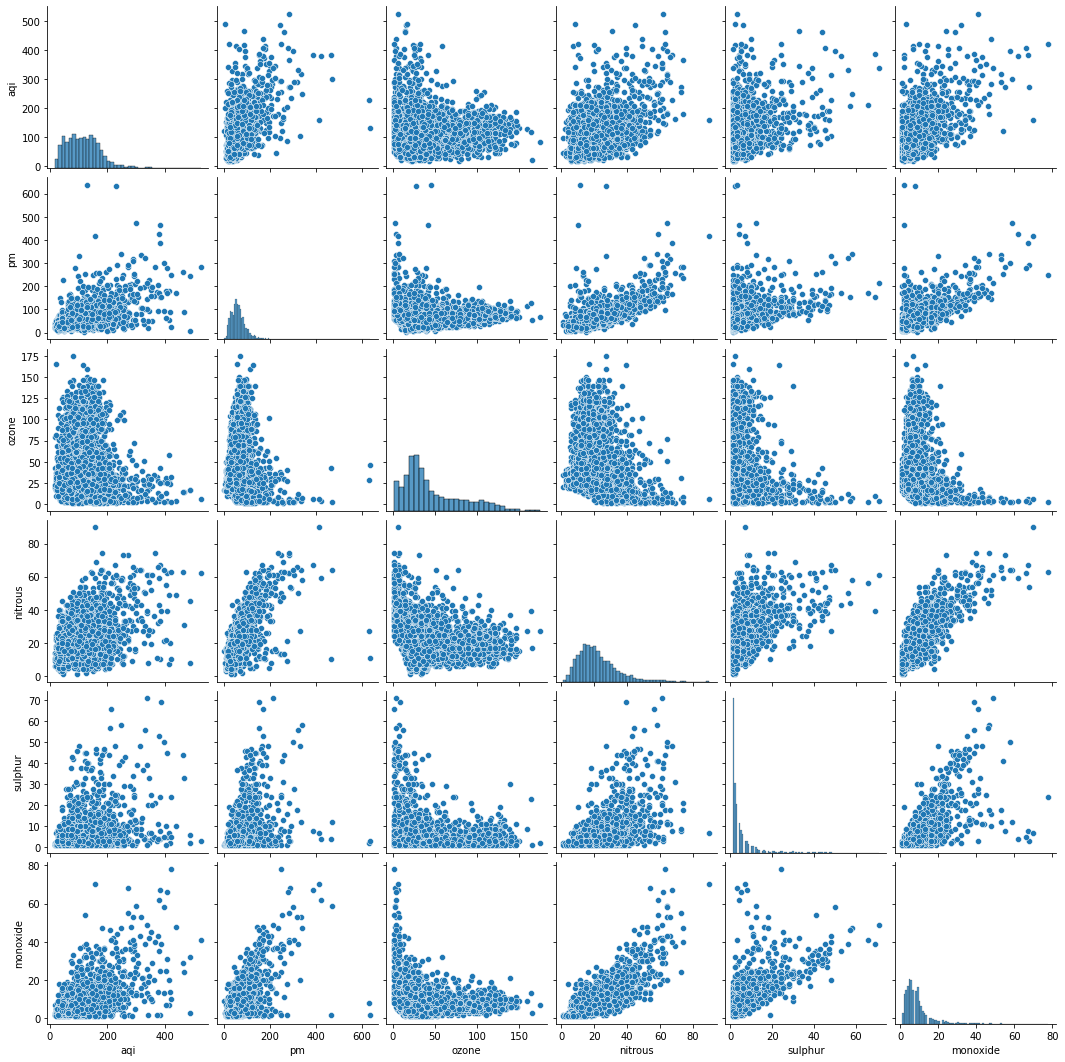

In [50]:
#multivariate analysis
sns.pairplot(data)
plt.show()

If we observe the above analysis there is no linear relation between independent and dependent features so linear algorithms don’t give good results

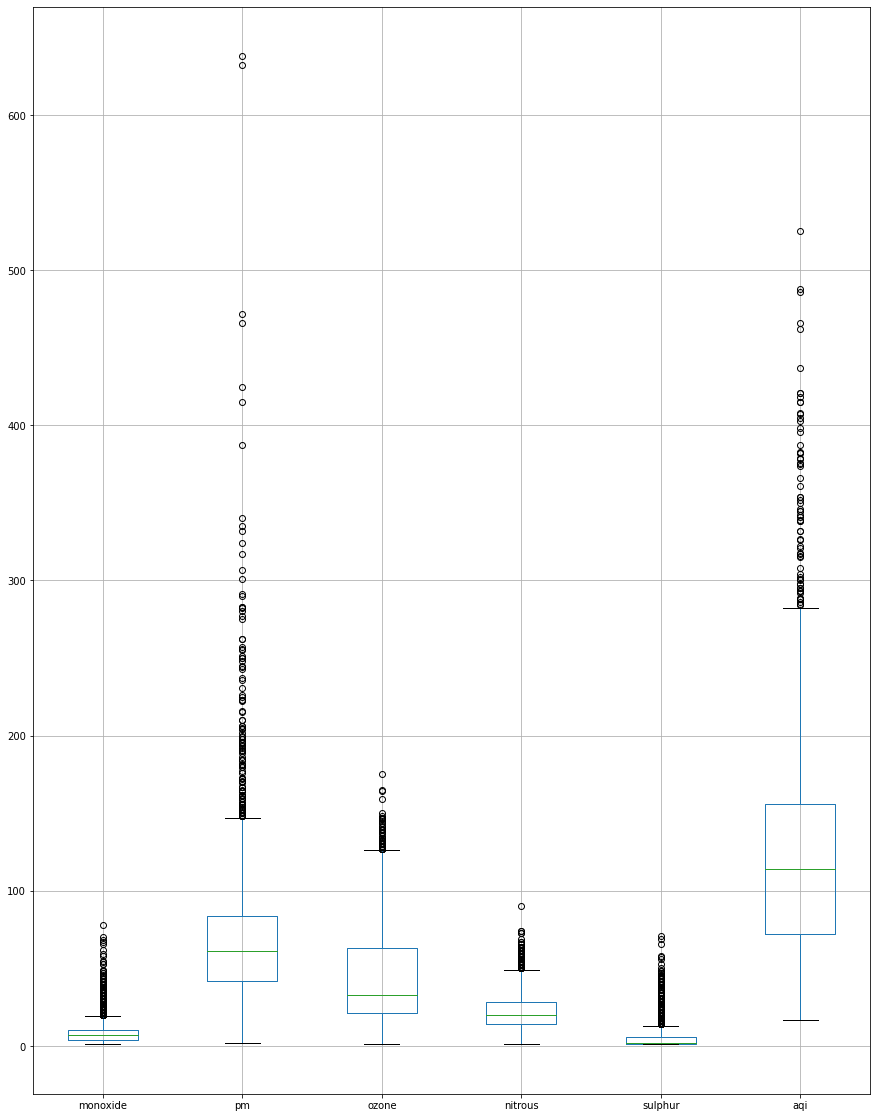

In [57]:
#Checking Outliers
plt.figure(figsize=(15, 20))
data.boxplot(column=['monoxide','pm','ozone','nitrous','sulphur','aqi'])
plt.show()

In [ ]:
sns.histplot[]

### Feature Importance
To know feature importance we use ExtraTreesRegressor (model-based feature selection)

In [64]:
X=data.drop(['aqi','date'],axis=1)
y = data['aqi']

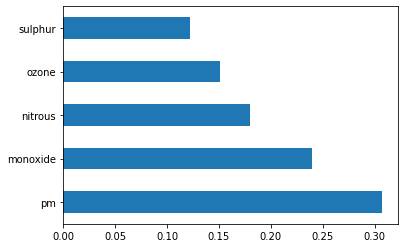

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
reg.feature_importances_
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Top 5 features to predict PM 2.5 (model-based feature selection)


In [67]:
data.corr()

,aqi,pm,ozone,nitrous,sulphur,monoxide
aqi,1.000000,0.505440,-0.040679,0.370852,0.335802,0.526488
pm,0.505440,1.000000,-0.045244,0.628817,0.441833,0.669795
ozone,-0.040679,-0.045244,1.000000,-0.270874,-0.196753,-0.209460
nitrous,0.370852,0.628817,-0.270874,1.000000,0.559377,0.754806
sulphur,0.335802,0.441833,-0.196753,0.559377,1.000000,0.680957
monoxide,0.526488,0.669795,-0.209460,0.754806,0.680957,1.000000


The correlation of AQI is postive with pm, sulphur(SO2),monoxide(CO)
Correlation tells us if PM 2.5 increases what is the behaviour of other features

All of them negative relation so if PM 2.5 increases other features decreases

Corr=-ve ======>> X increases then Y decreases

## Model Building

1. KNN Regressor

In [66]:
# weighted knn
weighted_tuned_reg = KNeighborsRegressor(n_neighbors=17,weights='distance')
weighted_tuned_reg.fit(X_train,y_train)
weighted_tuned_reg.score(X_train,y_train)

# performance of model on test dataset
weighted_tuned_reg.score(X_test,y_test)
# cross validation 
from sklearn.model_selection import cross_val_score
score=cross_val_score(weighted_tuned_reg,X,y,cv=5)
# cross validation perfomance
score.mean()

# Model evalutation
prediction=weighted_tuned_reg.predict(X_test)
# Comparing predicted PM2.5 and labeld PM 2.5
plt.scatter(y_test,prediction)
print('MSE:', metrics.mean_squared_error(y_test, prediction))


NameError: name 'KNeighborsRegressor' is not defined